
# Hands-on Lab: Generative AI for Data Repository Maintenance and Administration

**Learner Effort:** 30 mins

### Introduction
Data repository management and administration is a crucial aspect of data engineering. It consists of all aspects that ensure the maintenance of the quality, integrity, and completeness of the data. In this lab, you will explore the different aspects of data repository administration and management in the context of a real-world dataset.

### Objectives
In this lab, you will use generative AI to write code that:
- Handles missing entries in the data
- Removes duplicate entries from the data
- Detects outliers in the data

### Dataset
The dataset maps the price of laptops with different attributes and is a modified subset from the “Laptop Price Prediction using specifications” dataset on Kaggle.

**Dataset URL:**  
`https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0273EN-SkillsNetwork/labs/v1/m2/data/laptop_pricing_dataset_base.csv`


In [1]:

import pandas as pd

# Dataset URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0273EN-SkillsNetwork/labs/v1/m2/data/laptop_pricing_dataset_base.csv"

# Load dataset
df = pd.read_csv(url)
df.head()


,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


## Step 1: Handle Missing Values

In [2]:

import numpy as np

# Identify columns with "?" values
cols_with_question_mark = df.columns[df.isin(['?']).any()]
print("Columns with missing values represented by '?':", cols_with_question_mark.tolist())

# Replace "?" with mean value and convert to float
for col in cols_with_question_mark:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert "?" to NaN
    mean_val = df[col].mean()
    df[col].fillna(mean_val, inplace=True)

# Confirm changes
df[cols_with_question_mark].dtypes


Columns with missing values represented by '?': ['Screen_Size_cm', 'Weight_kg']


Screen_Size_cm    float64
Weight_kg         float64
dtype: object

## Step 2: Remove Duplicate Entries

In [3]:

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df.drop_duplicates(inplace=True)
print(f"Data shape after removing duplicates: {df.shape}")


Number of duplicate rows: 5
Data shape after removing duplicates: (238, 12)


## Step 3: Detect Outliers

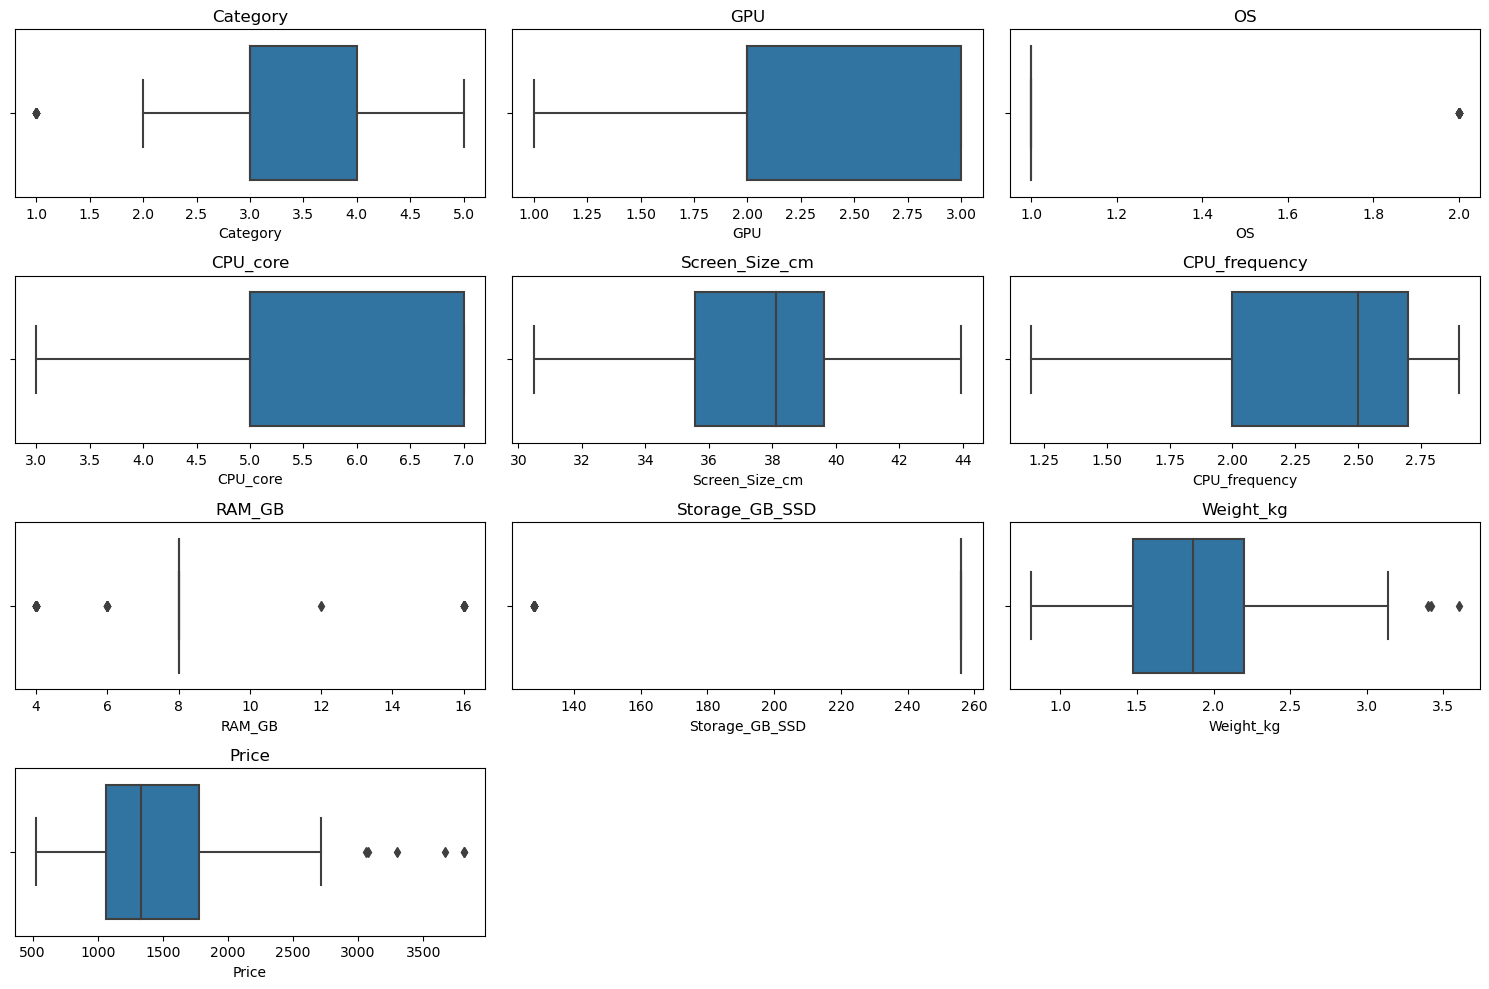

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i + 1)
    sns.boxplot(data=df, x=col)
    plt.title(col)
plt.tight_layout()
plt.show()
